In [1]:
import h5py
import pandas
import natsort
import glob
import numpy as np

In [4]:
ls ..

1_02_Convection_Example.ipynb  kaplan_dev.ipynb
1_02_Convection_Example.py     kaplan_dev.py
Analysis/                      kaplan_old.ipynb
array/                         nearest_neighbour_interpolation.ipynb
ext_results/                   population_control_test.ipynb
hpc_scripts/                   results/
html@                          run_script.sh
kaplan-TI.py                   unsupported_dan/
kaplan.ipynb                   user_data/
kaplan.py


In [6]:
#rdir = '/workspace'
rdir = '../'
dat_files0 = natsort.natsorted(glob.glob(rdir + 'ext_results/randoms/*metricSwarm*'))
dat_files1 = natsort.natsorted(glob.glob(rdir + 'ext_results/randoms/*interfaceStress*'))
dat_files0

['../ext_results/randoms/metricSwarm_50.h5']

In [7]:
#f = h5py.File(dat_files[0], "w")

In [12]:
data_list0 = []
for f in dat_files0[0:]:
    with h5py.File(f,'r') as hf:
        #print('List of arrays in this file: \n', hf.keys())
        data = hf.get('data')
        np_data = np.array(data)
        data_list0.append(np_data)

In [17]:
data_list1 = []
for f in dat_files1[0:]:
    with h5py.File(f,'r') as hf:
        #print('List of arrays in this file: \n', hf.keys())
        data = hf.get('data')
        np_data = np.array(data)
        data_list1.append(np_data)

In [20]:
data_list0[0][:,0]

array([ -3.33750518e-01,  -3.33330180e-01,  -3.32909842e-01, ...,
         1.10091086e-03,   6.58131338e-04,   2.14806230e-04])

Populating the interactive namespace from numpy and matplotlib


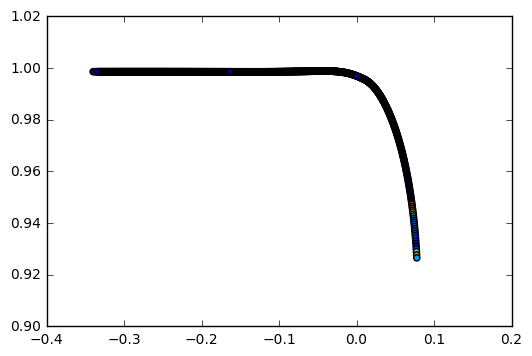

In [25]:
%pylab inline
fig, ax = plt.subplots()
rangeD = data_list1[0].max() - data_list1[0].min()

#for i in range(len(data_list1)):
#     ax.scatter(data_list0[i][:,0], data_list0[i][:,0], c=data_list1[i], s=(data_list1[i]/rangeD)*4e2)

ax.scatter(data_list0[0][:,0], data_list0[0][:,1],  c=data_list1[0])
#ax.set_xlim(0.0, 0.1)
#ax.set_ylim(0.9, 1.)

Populating the interactive namespace from numpy and matplotlib


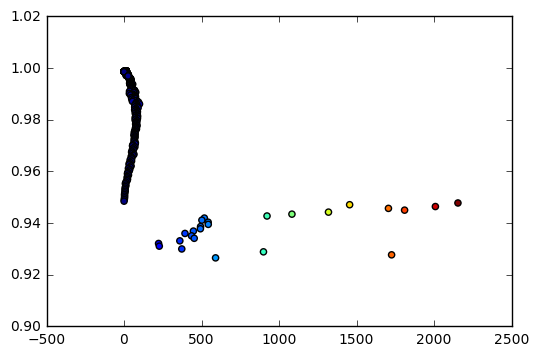

In [26]:
%pylab inline

fig, ax = plt.subplots()


for i in range(len(data_list1)):
    ax.scatter(data_list1[i]/(1e6*0.03364),(data_list0[i][:,1]), c=data_list1[i])

#0.03364 is the stress scale factor for these models
